In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 32
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    # ZS=True,
    # interpolation_scheme="gauss-legendre",
    MOOD=True,
    cascade="first-order",
    max_MOOD_iters=4,
    NAD=True,
    NAD_atol=0.0,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=0.0,
)

In [3]:
sim.run(5.0)

100%|██████████| 5.0/5.0 [00:07]                 


In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

In [5]:
sim.MOOD_config

MOODConfig(max_iters=4, cascade=[polyInterpolationScheme(name='poly', limiter=None, p=3, mode=1, lazy_primitives=True, gauss_legendre=False), polyInterpolationScheme(name='poly', limiter=None, p=0, mode=1, lazy_primitives=False, gauss_legendre=False)], NAD=True, NAD_rtol=1.0, NAD_atol=0.0, global_dmp=False, include_corners=False, PAD=True, PAD_bounds=array([[[[[  0.,   1.]]]],



       [[[[-inf,  inf]]]],



       [[[[-inf,  inf]]]],



       [[[[-inf,  inf]]]]]), PAD_atol=0.0, SED=False)

Text(0, 0.5, 'MOOD iterations/step')

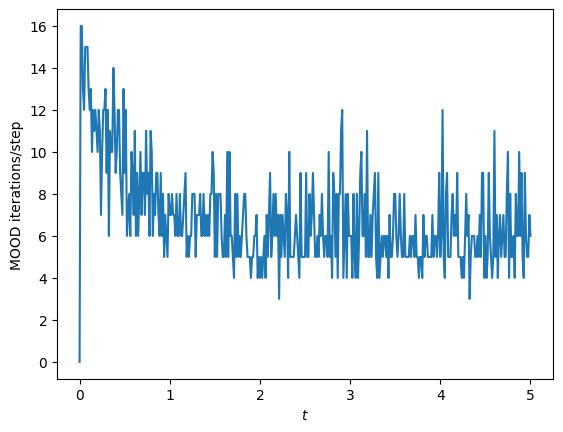

In [6]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["MOOD_iters"])
plt.xlabel(r"$t$")
plt.ylabel(r"MOOD iterations/step")

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.484375
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.484375
  warnings.warn(


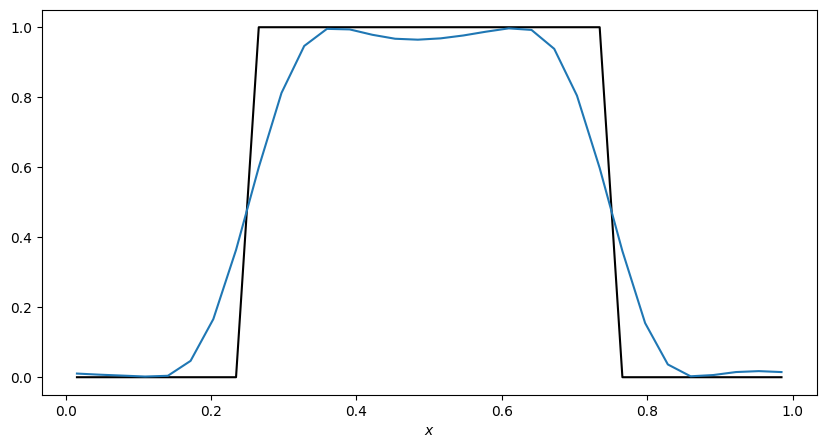

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)

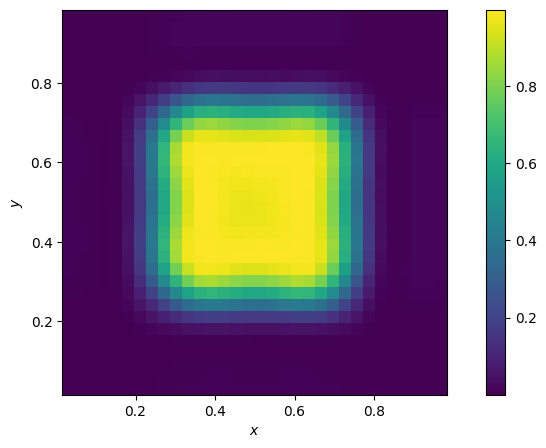

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", cell_averaged=True)
ax.figure.colorbar(ax.images[0], ax=ax)

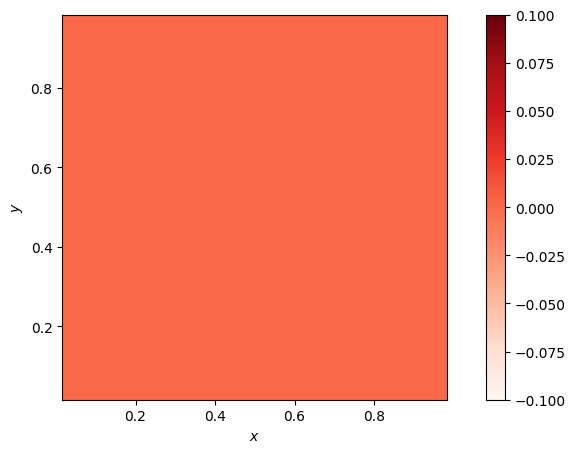

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.Reds)
ax.figure.colorbar(ax.images[0], ax=ax)

In [10]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 7.94
AdvectionSolver.log_quantity                             402                 0.01
ExplicitODESolver.integrate                                1                 7.99
ExplicitODESolver.take_step                              400                 7.56
FiniteVolumeSolver.f                                    1600                 7.45
FiniteVolumeSolver.inplace_apply_bc                    18530                 0.66
FiniteVolumeSolver.inplace_compute_fluxes               3176                 4.68
FiniteVolumeSolver.inplace_integrate_fluxes             6352                 1.39
FiniteVolumeSolver.inplace_interpolate_faces            6352                 2.73
FiniteVolumeSolver.riemann_solver                       6352                 0.62
FiniteVolumeSo